### IBM HR Analytics Employee Attrition & Performance Data

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. 
This is a fictional data set created by IBM data scientists.

### Dataset Description

Here, folowing are the labels of the attributes such as

1. Education :- 1 : 'Below College', 2 : 'College' ,3 : 'Bachelor' , 4 : 'Master' , 5 :'Doctor'
2. EnvironmentSatisfaction :- 1 : 'Low', 2 : 'Medium' , 3 : 'High' , 4 : 'Very High'
3. JobInvolvement :- 1 : 'Low', 2 : 'Medium' , 3 : 'High' , 4 : 'Very High'
4. JobSatisfaction :- 1 : 'Low', 2 : 'Medium' , 3 : 'High' , 4 : 'Very High'
5. PerformanceRating:- 1 : 'Low', 2 : 'Good' , 3 : 'Excellent' , 4 : 'Outstanding'
6. RelationshipSatisfaction:- 1 : 'Low' , 2 : 'Medium', 3 : 'High', 4 : 'Very High'
7. WorkLifeBalance :- 1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'

Dataset is available at:- https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Importing libraries

In [33]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Algorithm 
from sklearn.linear_model import LogisticRegression

### Retrieving the data

In [34]:
emp_attr = pd.read_csv("C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/HR-Employee-Attrition.csv")

In [35]:
emp_attr.shape

(1470, 35)

In [36]:
pd.set_option('display.max_column',40)
emp_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Data Types in dataset

In [37]:
emp_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

The data types are of the types "object" and "int".

Hence, we will be converting the "object" type to "category" data types.

In [38]:
cat_cols = []

for cols in emp_attr.select_dtypes("object"):
    cat_cols.append(cols)

In [39]:
emp_attr[cat_cols] = emp_attr[cat_cols].astype("category")

In [40]:
emp_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null category
BusinessTravel              1470 non-null category
DailyRate                   1470 non-null int64
Department                  1470 non-null category
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null category
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null category
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null category
MonthlyI

##### We can observe that there is a reduction in memory size from 400+ to 300+ KB on converting the data type to "category".

### Finding null values in data

In [41]:
emp_attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There aren't any null values in data.

### Oultier Analysis

In [42]:
num_cols = []
for cols in emp_attr.select_dtypes("int64"):
    num_cols.append(cols)

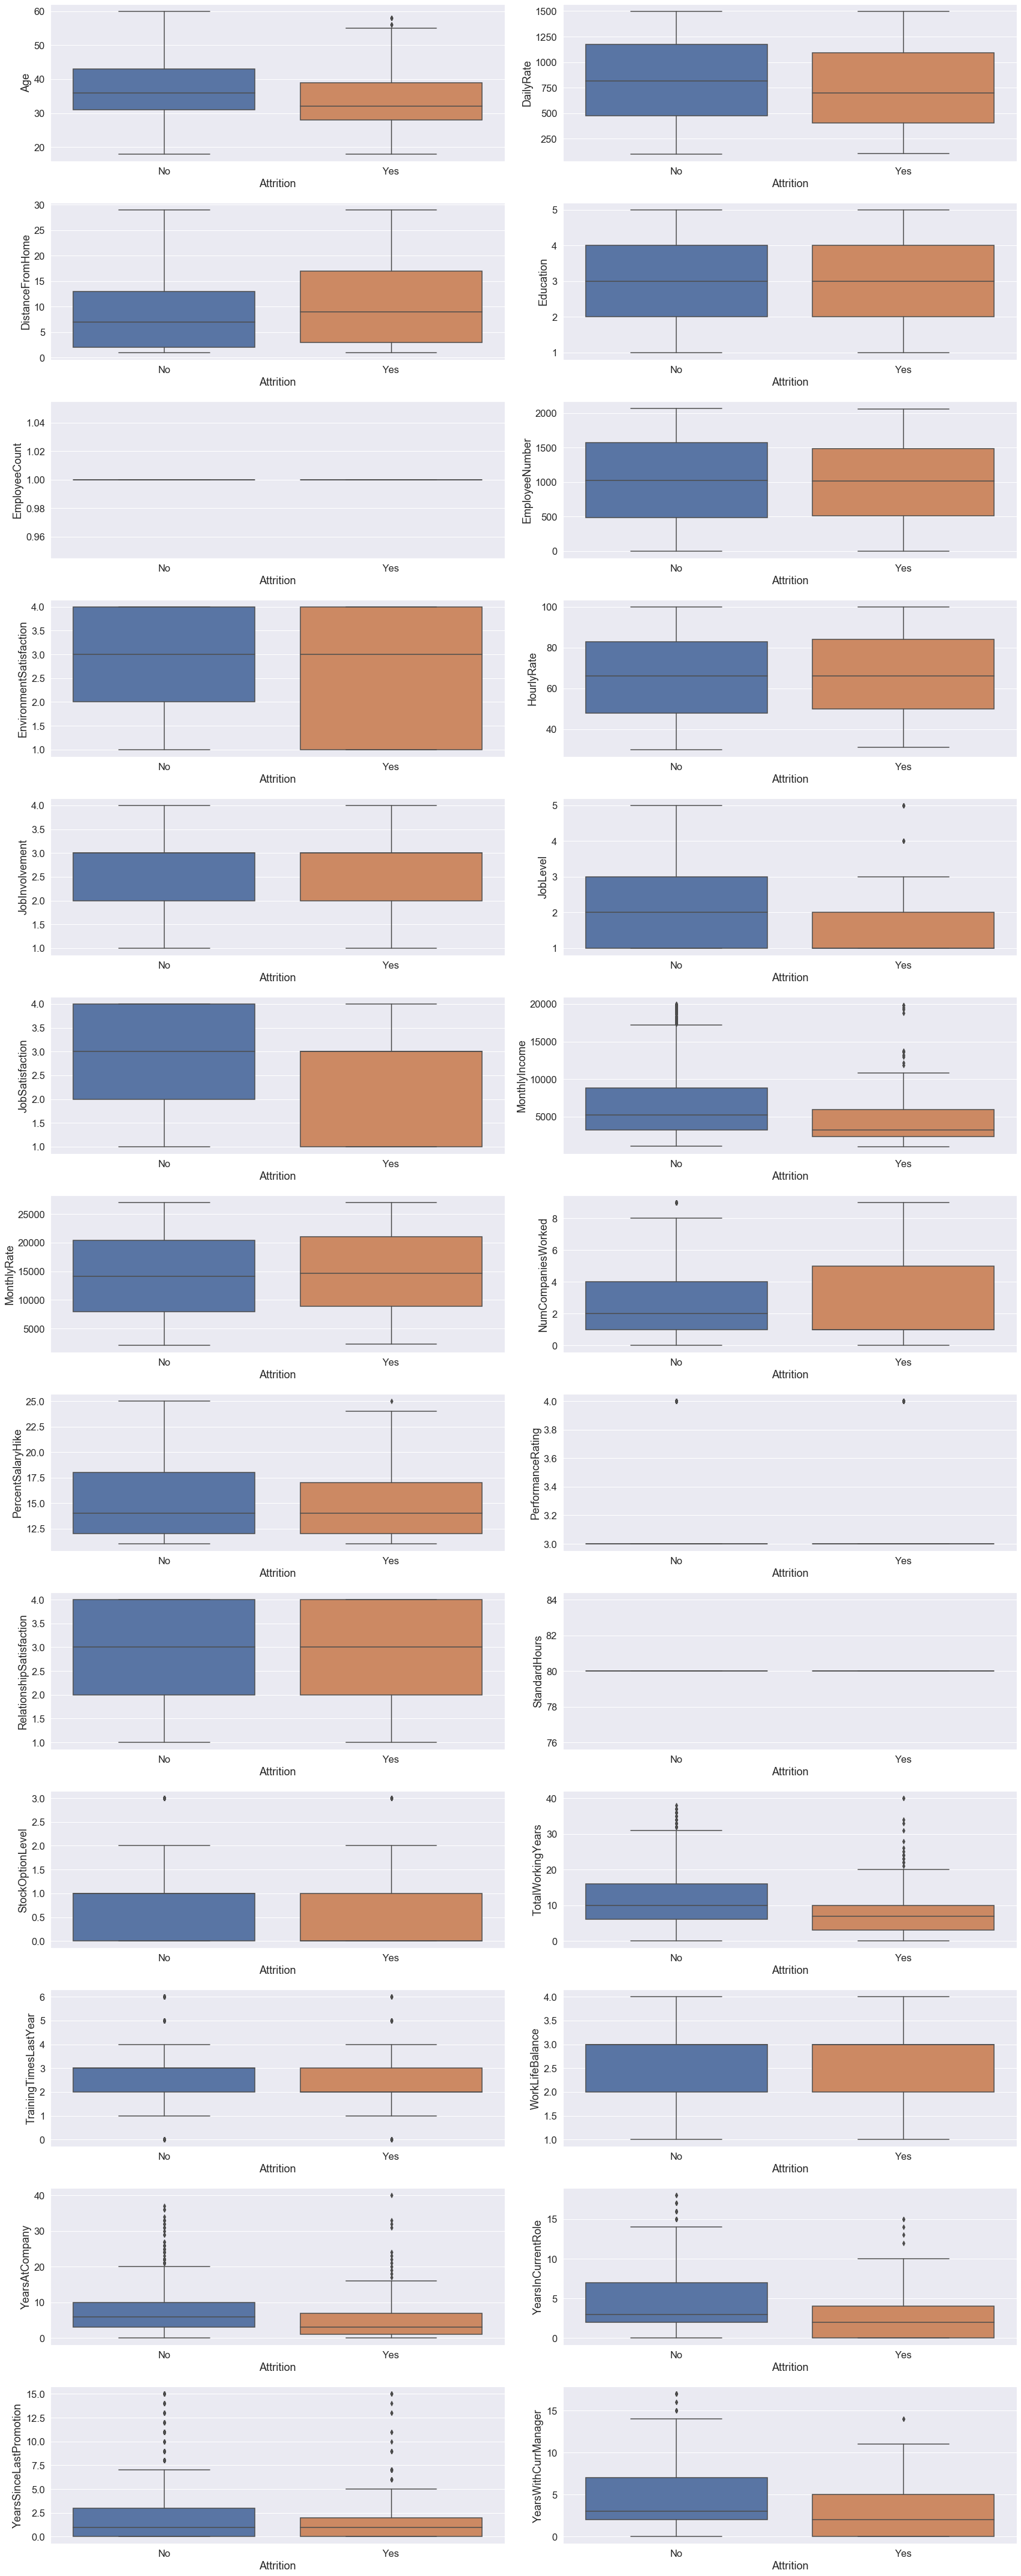

In [43]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(24,60))
i=1
for column in emp_attr[num_cols]:
    plt.subplot(13,2,i)
    sns.boxplot(x=emp_attr['Attrition'],y=emp_attr.loc[:,column])
    i = i + 1
    
plt.tight_layout()
plt.show()

##### We can see outliers on features but they cannot be termed as actual outliers. In business point of view, such scenarios do exist in real-life.

### Univariate Analysis

#### Analysing the target variable 'Attrition'

In [44]:
emp_attr.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

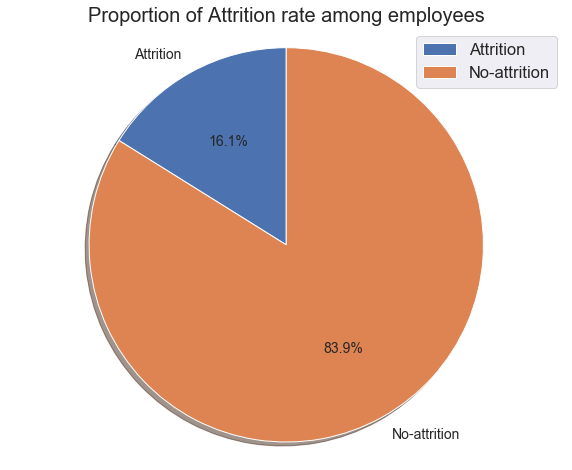

In [45]:
labels = 'Attrition','No-attrition'
sizes = [emp_attr.Attrition[emp_attr['Attrition']=='Yes'].count(), emp_attr.Attrition[emp_attr['Attrition']=='No']
         .count()]

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of Attrition rate among employees",size=20)
plt.show()

##### 16.2% employees are unhappy with the organisation . Hence, they are getting attrited.

### Bi-variate analysis

In [46]:
def bivariate_cat(data,col1,col2,rot):
    cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
    print(cross_tab)
    ct_attr = cross_tab['Yes'].sort_values(ascending=False)
    ct_attr.plot.bar(figsize=(12,5))
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of attrition among employees'.format(col1))
    plt.title('{} Vs attrition rate'.format(col1))
    plt.xticks(rotation=rot)
    plt.show()
    return ct_attr

#### Relationship between "Department" and Target label "Attrition"

Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63


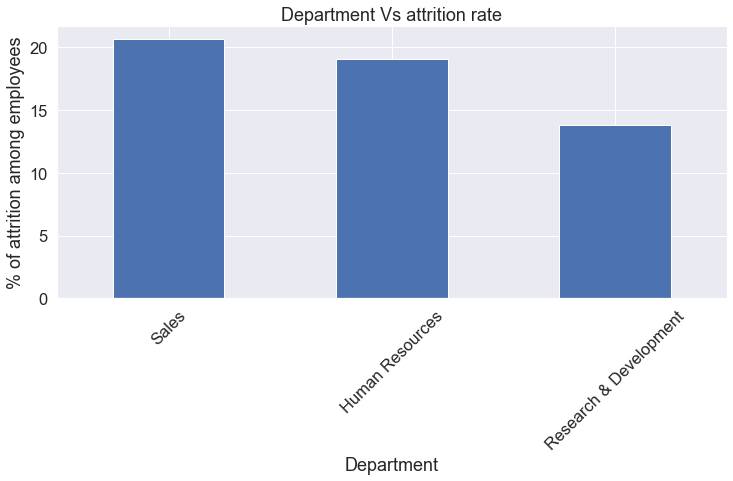

Department
Sales                     20.63
Human Resources           19.05
Research & Development    13.84
Name: Yes, dtype: float64

In [47]:
bivariate_cat(emp_attr,'Department','Attrition',45 )

##### Employees working in Sales are the ones who are getting attrited the most.

#### Relationship between "BusinessTravel" and "Department"

BusinessTravel          Non-Travel  Travel_Frequently  Travel_Rarely
Department                                                          
Human Resources               4.00               3.97           4.41
Research & Development       64.67              65.70          65.39
Sales                        31.33              30.32          30.20


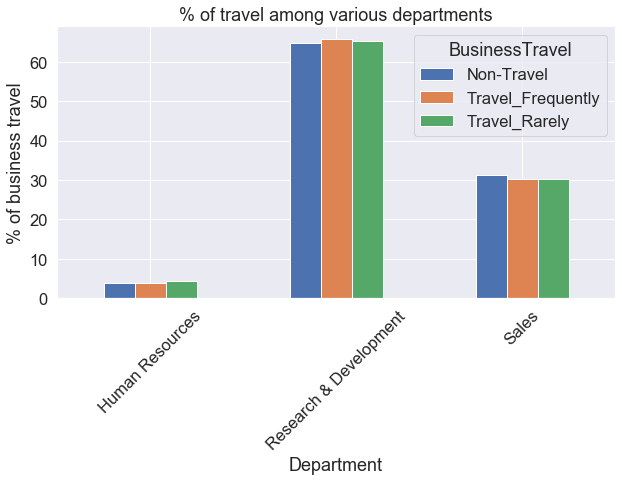

In [48]:
cross_tab = pd.crosstab(emp_attr["BusinessTravel"], emp_attr["Department"]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
ct_bt_dept = cross_tab.T
print(ct_bt_dept)
ct_bt_dept.plot.bar(figsize=(10,5))
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.ylabel('% of business travel')
plt.title("% of travel among various departments")
plt.show()

##### Employees belonging to "Research & Development" department are the ones who fall in all the three categories of travelling(non-travel, frequent_travel and rarely_travel).

### Chi-Square relationship among categorical features

In [49]:
from scipy.stats import chi2_contingency

In [50]:
factors_paired = [(i,j) for i in cat_cols for j in cat_cols]
chi2, p_values = [], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(emp_attr[f[0]], emp_attr[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
        
p1 = np.array(p_values).reshape((9,9))
p1 = pd.DataFrame(p1.round(2), index=cat_cols, columns=cat_cols)
p1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
Attrition,0.00,0.00,0.00,0.01,0.29,0.00,0.00,1.0,0.00
BusinessTravel,0.00,0.00,1.00,0.88,0.13,0.74,0.11,1.0,0.24
Department,0.00,1.00,0.00,0.00,0.23,0.00,0.16,1.0,0.95
EducationField,0.01,0.88,0.00,0.00,0.71,0.00,0.48,1.0,0.88
Gender,0.29,0.13,0.23,0.71,0.00,0.04,0.17,1.0,0.12
JobRole,0.00,0.74,0.00,0.00,0.04,0.00,0.04,1.0,0.58
MaritalStatus,0.00,0.11,0.16,0.48,0.17,0.04,0.00,1.0,0.66
Over18,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00
OverTime,0.00,0.24,0.95,0.88,0.12,0.58,0.66,1.0,0.00


From the above table, we observe various p-values for features. If p-value is > .05 and <.01 the features are dependent, else the features are independent of each other. In other words, if p-value lies in the range of (0.01-0.05) it accepts the null hypothesis else rejects it.

The feature "Over18" seems to be dependent with most of the features. Hence, we can drop the feature.

In [51]:
emp_attr = emp_attr.drop("Over18", axis=1)
emp_attr.shape

(1470, 34)

### Relationship between "Age" and "Attrition"

Simple way of finding relation with a numerical and categorical variable would be binning numerical variable.

In [52]:
print("Min Age:",min(emp_attr['Age']))
print("Max Age:",max(emp_attr['Age']))

Min Age: 18
Max Age: 60


In [53]:
emp_attr['age_bins'] = pd.cut(emp_attr.Age,bins=[18,30,40,50,60],labels=['Less Expr Employees','Expr Employees',
                                                                         'More Expr Employees','Reaching Retirement Age'])

Attrition                   No    Yes
age_bins                             
Less Expr Employees      74.60  25.40
Expr Employees           86.27  13.73
More Expr Employees      89.44  10.56
Reaching Retirement Age  87.41  12.59


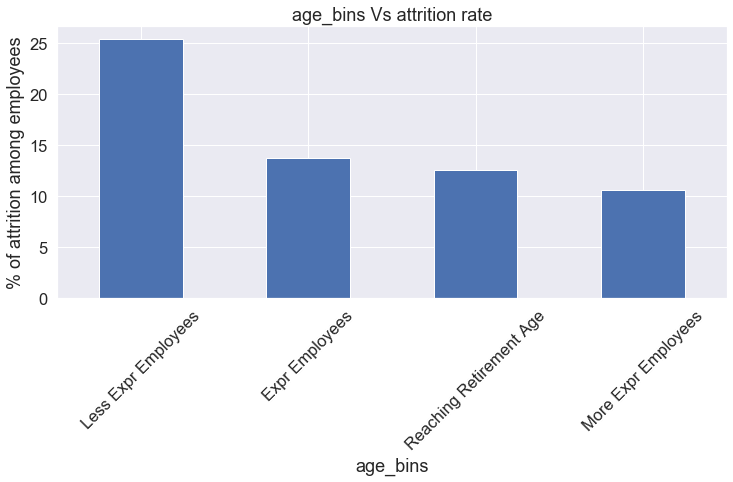

age_bins
Less Expr Employees        25.40
Expr Employees             13.73
Reaching Retirement Age    12.59
More Expr Employees        10.56
Name: Yes, dtype: float64

In [54]:
bivariate_cat(emp_attr,'age_bins','Attrition',45)

##### Employees who are in the age group of (18-30)[Less Expr Employees] have an high attributed rate in comparison with other age groups.

#### Chi-Square test between "age_bins" and "Attrition"

In [55]:
cross_tab = pd.crosstab(emp_attr['age_bins'], emp_attr['Attrition'],margins=True)
cross_tab

Attrition,No,Yes,All
age_bins,,,
Less Expr Employees,282,96,378
Expr Employees,534,85,619
More Expr Employees,288,34,322
Reaching Retirement Age,125,18,143
All,1229,233,1462


In [56]:
# Use for chi-square test
import researchpy as rp

In [57]:
table, results = rp.crosstab(emp_attr['age_bins'], emp_attr['Attrition'],prop='col',test='chi-square')
table

Attrition                
                               No     Yes     All
age_bins                                         
Less Expr Employees         22.95   41.20   25.85
Expr Employees              43.45   36.48   42.34
More Expr Employees         23.43   14.59   22.02
Reaching Retirement Age     10.17    7.73    9.78
All                        100.00  100.00  100.00

In [58]:
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,35.6450
1,p-value =,0.0000
2,Cramer's V =,0.1561


In the results table, researchpy’s crosstab method also returned Cramer’s V which is an effect size measure. This tells how strong the relationship between the two variables are. Let’s interpret the results.

There is statistically significant relationship between age of employee and the attrition rate as shows the chi-square value = 32.8978 with p-value <0.00001. The strength of the relationship is small,with Cramer's V = 0.1661

In [59]:
emp_attr = emp_attr.drop(['EmployeeNumber','EmployeeCount','age_bins'], axis=1)

In [60]:
emp_attr.shape

(1470, 32)

#### Scaling up features

In [61]:
from sklearn.preprocessing import LabelEncoder

# target column
tgt_col = ['Attrition']

# Categorical cols
category_names = emp_attr.nunique()[emp_attr.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

# Numerical cols
num_cols = [i for i in emp_attr.columns if i not in category_names + tgt_col]

# Binary cols
bin_cols = emp_attr.nunique()[emp_attr.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    emp_attr[i] = le.fit_transform(emp_attr[i])
    
# Duplicating cols for multi-value columns
emp_attr = pd.get_dummies(data=emp_attr, columns=multi_cols)

In [62]:
emp_attr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StandardHours_80,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,0,94,5993,19479,1,11,0,8,6,4,0,5,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,49,0,279,8,1,61,5130,24907,0,23,1,10,10,7,1,7,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,37,1,1373,2,1,92,2090,2396,1,15,0,7,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,33,0,1392,3,0,56,2909,23159,1,11,0,8,8,7,3,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,27,0,591,2,1,40,3468,16632,0,12,0,6,2,2,2,2,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


#### Normalizing features

In [63]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
emp_attr[num_cols] = minmax.fit_transform(emp_attr[num_cols].values)

In [64]:
emp_attr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StandardHours_80,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.547619,1,0.715820,0.000000,0,0.914286,0.262454,0.698053,1,0.000000,0,0.200,0.15,0.222222,0.000000,0.294118,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.738095,0,0.126700,0.250000,1,0.442857,0.217009,0.916001,0,0.857143,1,0.250,0.25,0.388889,0.066667,0.411765,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0.452381,1,0.909807,0.035714,1,0.885714,0.056925,0.012126,1,0.285714,0,0.175,0.00,0.000000,0.000000,0.000000,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.357143,0,0.923407,0.071429,0,0.371429,0.100053,0.845814,1,0.000000,0,0.200,0.20,0.388889,0.200000,0.000000,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.214286,0,0.350036,0.035714,1,0.142857,0.129489,0.583738,0,0.071429,0,0.150,0.05,0.111111,0.133333,0.117647,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


### Model Building

In [65]:
cols = [i for i in emp_attr.columns if i not in emp_attr['Attrition']]
X = emp_attr[cols]
Y = pd.DataFrame(emp_attr['Attrition'])

In [66]:
X.head()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StandardHours_80,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.547619,1,0.715820,0.000000,0,0.914286,0.262454,0.698053,1,0.000000,0,0.200,0.15,0.222222,0.000000,0.294118,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.738095,0,0.126700,0.250000,1,0.442857,0.217009,0.916001,0,0.857143,1,0.250,0.25,0.388889,0.066667,0.411765,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0.452381,1,0.909807,0.035714,1,0.885714,0.056925,0.012126,1,0.285714,0,0.175,0.00,0.000000,0.000000,0.000000,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.357143,0,0.923407,0.071429,0,0.371429,0.100053,0.845814,1,0.000000,0,0.200,0.20,0.388889,0.200000,0.000000,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.214286,0,0.350036,0.035714,1,0.142857,0.129489,0.583738,0,0.071429,0,0.150,0.05,0.111111,0.133333,0.117647,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


### Logistic Regression using Statsmodel

In [67]:
import statsmodels.api as sm
model = sm.Logit(Y,X)
result = model.fit(method='ncg')
result.summary()

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 32
         Hessian evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1393
Method:                           MLE   Df Model:                           76
Date:                Thu, 14 Nov 2019   Pseudo R-squ.:                   1.000
Time:                        13:08:31   Log-Likelihood:              -0.010530
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                9.282e-222
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.7345        nan        nan        nan         nan         nan
Attrition                            22.4004        nan        nan        nan         nan         nan
DailyRate                            -0.7044        nan        nan        nan         nan         nan
DistanceFromHome                      0.3981        nan        nan        nan         nan         nan
Gender                                0.0404        nan        nan        nan         nan         nan
HourlyRate                           -0.2028        nan        nan        nan         nan         nan
MonthlyIncome                        -0.8588        nan        nan        nan         nan         nan
MonthlyRate                          -0.2950        nan        nan        nan         nan         nan
OverTime                              0.8657        nan        nan        nan         nan         nan
PercentSalaryHike                    -0.3923        nan        nan        nan         nan         nan
PerformanceRating                     0.0408        nan        nan        nan         nan         nan
TotalWorkingYears                    -0.4747        nan        nan        nan         nan         nan
YearsAtCompany                        0.2111        nan        nan        nan         nan         nan
YearsInCurrentRole                   -0.5954        nan        nan        nan         nan         nan
YearsSinceLastPromotion               0.5846        nan        nan        nan         nan         nan
YearsWithCurrManager                 -0.8116        nan        nan        nan         nan         nan
BusinessTravel_Non-Travel            -1.1311        nan        nan        nan         nan         nan
BusinessTravel_Travel_Frequently     -0.3067        nan        nan        nan         nan         nan
BusinessTravel_Travel_Rarely         -0.7979        nan        nan        nan         nan         nan
Department_Human Resources           -0.5644        nan        nan        nan         nan         nan
Department_Research & Development    -1.0741        nan        nan        nan         nan         nan
Department_Sales                     -0.5972        nan        nan        nan         nan         nan
Education_1                          -0.4879        nan        nan        nan         nan         nan
Education_2                          -0.4778        nan        nan        nan         nan         nan
Education_3                          -0.5765        nan        nan        nan         nan         nan
Education_4                          -0.4939        nan        nan        nan         nan         nan
Education_5                          -0.1995        nan        nan        nan         nan         nan
EducationField_Human Resources       -0.1935        nan        nan        nan         nan         nan
EducationField_Life Sciences         -0.6521        nan        nan        nan  

### ROC Curve for Logistic Regression

In [68]:
from sklearn.metrics import roc_curve,auc

In [69]:
# Adding prediction to a dataframe
X['pred'] = result.predict(X)

In [70]:
fpr, tpr, thresholds = roc_curve(Y, X['pred'])
roc_auc = auc(fpr, tpr)
print("Area under the ROC Curve : %f" % roc_auc)

Area under the ROC Curve : 1.000000


The optimal cut off would be where tpr is high and fpr is low, tpr - (1 - fpr) is 0 or near to zero is the optimal cut off point

In [71]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),
                    '1-fpr':pd.Series(1-fpr, index=i), 'tf':pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
1,0.0,1.0,1.0,0.0,0.999875


[]

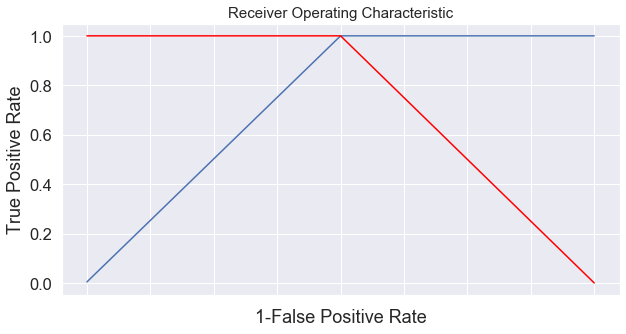

In [72]:
# Plot tpr Vs 1-fpr
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic',fontsize=15)
ax.set_xticklabels([])

### Logistic Regression using sklearn

In [73]:
X = X.drop("pred", axis=1)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y ,test_size=0.3, stratify=Y,random_state=0)

In [76]:
logReg = LogisticRegression()

In [77]:
# Training the model and storing information learned from the data
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
# Predict labels for test data
y_pred = logReg.predict(X_test)


In [82]:
# Score method to get accuracy of model
score = logReg.score(X_test,Y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 1.0


In [83]:
# Precting Probabilities for test data
Y_pred_proba = logReg.predict_proba(X_test)

In [84]:
Y_pred_proba

array([[0.99231883, 0.00768117],
       [0.99649839, 0.00350161],
       [0.9967713 , 0.0032287 ],
       [0.99067039, 0.00932961],
       [0.99377709, 0.00622291],
       [0.98951185, 0.01048815],
       [0.99583265, 0.00416735],
       [0.99336024, 0.00663976],
       [0.04474491, 0.95525509],
       [0.98693499, 0.01306501],
       [0.02111299, 0.97888701],
       [0.99627314, 0.00372686],
       [0.9957717 , 0.0042283 ],
       [0.99186537, 0.00813463],
       [0.99349299, 0.00650701],
       [0.04791035, 0.95208965],
       [0.98486814, 0.01513186],
       [0.99154076, 0.00845924],
       [0.98501318, 0.01498682],
       [0.98544359, 0.01455641],
       [0.99342268, 0.00657732],
       [0.9855798 , 0.0144202 ],
       [0.98446535, 0.01553465],
       [0.99060006, 0.00939994],
       [0.99238273, 0.00761727],
       [0.99402367, 0.00597633],
       [0.99661239, 0.00338761],
       [0.99540452, 0.00459548],
       [0.99471098, 0.00528902],
       [0.99588471, 0.00411529],
       [0.

In [85]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [86]:
pred_proba_df = pd.DataFrame(logReg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
precision_lst = []
recall_lst = []
for i in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    precision = precision_score(Y_test.as_matrix().reshape(Y_test.as_matrix().size,1),
                               (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    precision_lst.append(precision)
    recall = recall_score(Y_test.as_matrix().reshape(Y_test.as_matrix().size,1),
                         (Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    recall_lst.append(recall)

In [87]:
thresh_df = pd.DataFrame()
thresh_df['Threshold'] = threshold_list
thresh_df['Precision'] = precision_lst
thresh_df['Recall'] = recall_lst
thresh_df

,Threshold,Precision,Recall
0,0.05,1.0,1.000000
1,0.10,1.0,1.000000
2,0.15,1.0,1.000000
3,0.20,1.0,1.000000
4,0.25,1.0,1.000000
5,0.30,1.0,1.000000
6,0.35,1.0,1.000000
7,0.40,1.0,1.000000
8,0.45,1.0,1.000000
9,0.50,1.0,1.000000


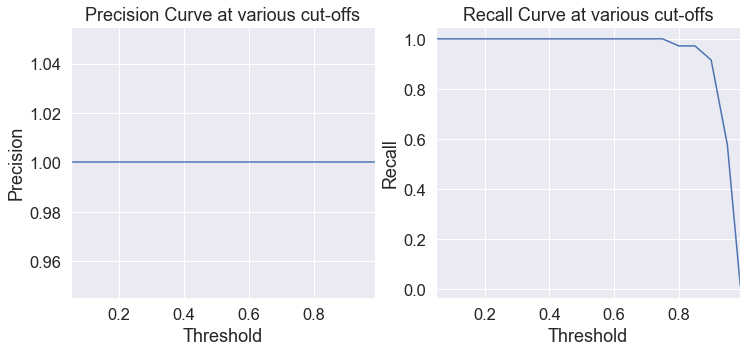

In [88]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharex=True,figsize=(12,5))

# Use ax1 to plot precision
thresh_df.plot(x='Threshold', y='Precision',legend=False, ax=ax1)
ax1.set_ylabel('Precision')
ax1.set_title("Precision Curve at various cut-offs")

# Use ax2 to plot recall
thresh_df.plot(x='Threshold',y='Recall',legend=False, ax=ax2)
ax2.set_ylabel('Recall')
ax2.set_title("Recall Curve at various cut-offs")

plt.show()

### Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix

Confusion Matrix : [[370   0]
 [  0  71]]


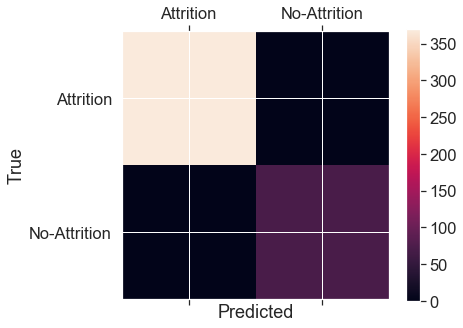

In [90]:
# Confusion Matrix
labels=['Attrition','No-Attrition']
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix :",conf_matrix)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Classification Report

In [91]:
from yellowbrick.classifier import ClassificationReport

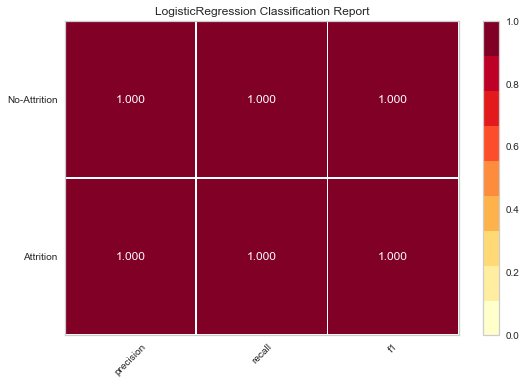

In [92]:
visualizer = ClassificationReport(logReg, classes=['Attrition','No-Attrition'])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
g = visualizer.poof()

### ROC Curve through sklearn

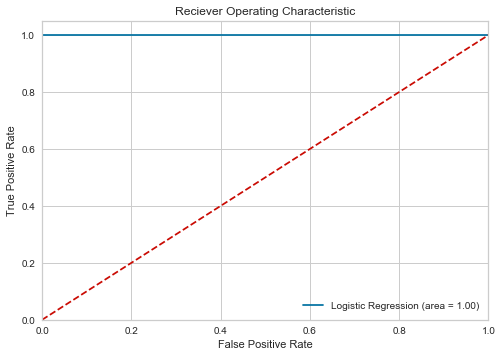

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciever Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

#### Dotted line represents the ROC Curve of a purely random classifier. A good classifier stays as far away from the line as possible.